In [1]:
%matplotlib inline

In [2]:
import rasterio as rio
import rasterio.plot
import rasterio.mask
import geopandas as gpds
import fiona
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pds
from pathlib import Path

In [55]:
# First we create a variable called nodata
with rio.open(path) as dataset:
    print(dataset.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 483, 'height': 371, 'count': 1, 'crs': CRS.from_epsg(3057), 'transform': Affine(1326.265104968944, 0.0, 186945.7821,
       0.0, -1328.5727816711592, 739208.5202)}


In [57]:
nodata = dataset.meta['nodata']

# Now we process the ESDD soil properties:

In [73]:
# Read the combined watershed file
combined_wsheds_path = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\GIS\GEE_vegetation\compiled_feb9.shp")
wsheds = gpds.read_file(combined_wsheds_path)
wsheds = wsheds.set_index('id')

# Bý til lista með nöfnum sem verða dict keys:
var_list = ['clay_fra','grav_fra','soil_tawc','oc_fra',
            'silt_fra','soil_poros','root_dep','sand_fra']
final_dict = dict()
for var in var_list:
    
    path = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\GIS\european_soil_database_derived_data\ESDD_processed_data_reprojection_in_QGIS\%s_depth_weighted_average.tif" % var) #nodata_set_to_nan
    src = rio.open(path)

    var_dict = dict()
    for idx in wsheds.index:
        # Clip raster with the watershed shapefile
        out_image, out_transform = rasterio.mask.mask(src, [wsheds.loc[idx]['geometry']], crop=True)
        out_meta = src.meta

        rster = out_image[0]
        rster = rster[rster != nodata] #, np.nan]
        var_dict[idx] = np.nanmean(rster)

        print('idx %s done' % idx)
    final_dict[var] = var_dict

idx 1 done
idx 10 done
idx 100 done
idx 101 done
idx 1010 done
idx 102 done
idx 103 done
idx 104 done
idx 1040 done
idx 10400 done
idx 105 done
idx 106 done
idx 107 done
idx 108 done
idx 11 done
idx 12 done
idx 13 done
idx 14 done
idx 15 done
idx 16 done
idx 17 done
idx 18 done
idx 19 done
idx 2 done
idx 20 done
idx 21 done
idx 22 done
idx 23 done
idx 24 done
idx 25 done
idx 26 done
idx 27 done
idx 28 done
idx 29 done
idx 3 done
idx 30 done
idx 31 done
idx 32 done
idx 33 done
idx 34 done
idx 35 done
idx 36 done
idx 37 done
idx 38 done
idx 39 done
idx 4 done
idx 40 done
idx 41 done
idx 42 done
idx 43 done
idx 44 done
idx 45 done
idx 46 done
idx 47 done
idx 48 done
idx 49 done
idx 5 done
idx 50 done
idx 51 done
idx 52 done
idx 53 done
idx 54 done
idx 55 done
idx 56 done
idx 57 done
idx 58 done
idx 59 done
idx 6 done
idx 60 done
idx 61 done
idx 62 done
idx 63 done
idx 64 done
idx 65 done
idx 66 done
idx 67 done
idx 68 done
idx 69 done
idx 7 done
idx 70 done
idx 71 done
idx 72 done
idx 73 

<ipython-input-73-ac6681449870>:26: RuntimeWarning: Mean of empty slice
  var_dict[idx] = np.nanmean(rster)


idx 77 done
idx 78 done
idx 79 done
idx 8 done
idx 80 done
idx 81 done
idx 82 done
idx 83 done
idx 84 done
idx 85 done
idx 86 done
idx 87 done
idx 88 done
idx 89 done
idx 9 done
idx 90 done
idx 900 done
idx 91 done
idx 92 done
idx 93 done
idx 94 done
idx 95 done
idx 96 done
idx 97 done
idx 98 done
idx 99 done
idx 1 done
idx 10 done
idx 100 done
idx 101 done
idx 1010 done
idx 102 done
idx 103 done
idx 104 done
idx 1040 done
idx 10400 done
idx 105 done
idx 106 done
idx 107 done
idx 108 done
idx 11 done
idx 12 done
idx 13 done
idx 14 done
idx 15 done
idx 16 done
idx 17 done
idx 18 done
idx 19 done
idx 2 done
idx 20 done
idx 21 done
idx 22 done
idx 23 done
idx 24 done
idx 25 done
idx 26 done
idx 27 done
idx 28 done
idx 29 done
idx 3 done
idx 30 done
idx 31 done
idx 32 done
idx 33 done
idx 34 done
idx 35 done
idx 36 done
idx 37 done
idx 38 done
idx 39 done
idx 4 done
idx 40 done
idx 41 done
idx 42 done
idx 43 done
idx 44 done
idx 45 done
idx 46 done
idx 47 done
idx 48 done
idx 49 done
idx 5

idx 85 done
idx 86 done
idx 87 done
idx 88 done
idx 89 done
idx 9 done
idx 90 done
idx 900 done
idx 91 done
idx 92 done
idx 93 done
idx 94 done
idx 95 done
idx 96 done
idx 97 done
idx 98 done
idx 99 done
idx 1 done
idx 10 done
idx 100 done
idx 101 done
idx 1010 done
idx 102 done
idx 103 done
idx 104 done
idx 1040 done
idx 10400 done
idx 105 done
idx 106 done
idx 107 done
idx 108 done
idx 11 done
idx 12 done
idx 13 done
idx 14 done
idx 15 done
idx 16 done
idx 17 done
idx 18 done
idx 19 done
idx 2 done
idx 20 done
idx 21 done
idx 22 done
idx 23 done
idx 24 done
idx 25 done
idx 26 done
idx 27 done
idx 28 done
idx 29 done
idx 3 done
idx 30 done
idx 31 done
idx 32 done
idx 33 done
idx 34 done
idx 35 done
idx 36 done
idx 37 done
idx 38 done
idx 39 done
idx 4 done
idx 40 done
idx 41 done
idx 42 done
idx 43 done
idx 44 done
idx 45 done
idx 46 done
idx 47 done
idx 48 done
idx 49 done
idx 5 done
idx 50 done
idx 51 done
idx 52 done
idx 53 done
idx 54 done
idx 55 done
idx 56 done
idx 57 done
idx 5

# Now we process the bedrock depth:

In [84]:
var = 'bedrk_dep'

path = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\GIS\average_soil_and_sedimentary_deposit_thickness\average_soil_and_sedimentary-deposit_thickness_nodata_is_zero_clipped_isn93.tif") #nodata_set_to_nan
src = rio.open(path)

var_dict = dict()
for idx in wsheds.index:
    # Clip raster with the watershed shapefile
    out_image, out_transform = rasterio.mask.mask(src, [wsheds.loc[idx]['geometry']], crop=True)
    out_meta = src.meta

    rster = out_image[0]
    rster = rster[rster != nodata] #, np.nan]
    var_dict[idx] = np.nanmean(rster)

    print('idx %s done' % idx)
final_dict[var] = var_dict

idx 1 done
idx 10 done
idx 100 done
idx 101 done
idx 1010 done
idx 102 done
idx 103 done
idx 104 done
idx 1040 done
idx 10400 done
idx 105 done
idx 106 done
idx 107 done
idx 108 done
idx 11 done
idx 12 done
idx 13 done
idx 14 done
idx 15 done
idx 16 done
idx 17 done
idx 18 done
idx 19 done
idx 2 done
idx 20 done
idx 21 done
idx 22 done
idx 23 done
idx 24 done
idx 25 done
idx 26 done
idx 27 done
idx 28 done
idx 29 done
idx 3 done
idx 30 done
idx 31 done
idx 32 done
idx 33 done
idx 34 done
idx 35 done
idx 36 done
idx 37 done
idx 38 done
idx 39 done
idx 4 done
idx 40 done
idx 41 done
idx 42 done
idx 43 done
idx 44 done
idx 45 done
idx 46 done
idx 47 done
idx 48 done
idx 49 done
idx 5 done
idx 50 done
idx 51 done
idx 52 done
idx 53 done
idx 54 done
idx 55 done
idx 56 done
idx 57 done
idx 58 done
idx 59 done
idx 6 done
idx 60 done
idx 61 done
idx 62 done
idx 63 done
idx 64 done
idx 65 done
idx 66 done
idx 67 done
idx 68 done
idx 69 done
idx 7 done
idx 70 done
idx 71 done
idx 72 done
idx 73 

<ipython-input-84-35c808c90bdb>:14: RuntimeWarning: Mean of empty slice
  var_dict[idx] = np.nanmean(rster)


idx 75 done
idx 76 done
idx 77 done
idx 78 done
idx 79 done
idx 8 done
idx 80 done
idx 81 done
idx 82 done
idx 83 done
idx 84 done
idx 85 done
idx 86 done
idx 87 done
idx 88 done
idx 89 done
idx 9 done
idx 90 done
idx 900 done
idx 91 done
idx 92 done
idx 93 done
idx 94 done
idx 95 done
idx 96 done
idx 97 done
idx 98 done
idx 99 done


In [ ]:
# Create a pandas dataframe with the soil attributes

In [85]:
df = pds.DataFrame(final_dict)
# Convert from % to fraction, and root dep from cm to m
df[['clay_fra','grav_fra','oc_fra','silt_fra','sand_fra','root_dep']]/=100

In [87]:
df

,clay_fra,grav_fra,soil_tawc,oc_fra,silt_fra,soil_poros,root_dep,sand_fra,bedrk_dep
1,0.140160,0.152176,0.069695,0.012388,0.232741,0.412602,0.512844,0.628085,0.936508
10,0.046028,0.051487,0.129548,0.010824,0.121838,0.348218,1.000000,0.836053,0.875000
100,0.133373,0.167508,0.064589,0.014173,0.257494,0.413645,0.459822,0.611257,6.321726
101,0.071151,0.106659,0.089143,0.014110,0.201273,0.373380,0.632523,0.728764,12.520891
1010,0.059520,0.093939,0.089161,0.013878,0.187734,0.365273,0.636848,0.752558,10.305555
...,...,...,...,...,...,...,...,...,...
95,0.040818,0.078147,0.140502,0.014059,0.172814,0.353835,1.000000,0.784944,15.476191
96,0.181369,0.214215,0.046636,0.014160,0.299270,0.444564,0.328319,0.515914,14.768421
97,0.040000,0.082000,0.142221,0.014640,0.183000,0.354717,1.000000,0.777000,3.571429
98,0.130478,0.099583,0.123091,0.011417,0.134667,0.410008,0.965385,0.727321,5.071429


In [88]:
# Round to three decimals and save file
df_rounded = df.round(3)

savepath = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\lamah_ice\A_basins_total_upstrm\1_attributes\soil_attrs.csv")
df_rounded.to_csv(savepath)

C:\Users\hordurbhe\Anaconda3\envs\thjorsa_ml\lib\site-packages\matplotlib\image.py:506: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)


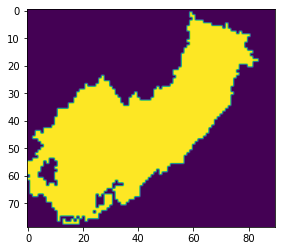

<AxesSubplot:>

In [24]:
import rasterio

from rasterio.plot import show
show(out_image)

In [ ]:
# First we have to change the nodata values of the raster, from -3.4028235e+38 to np.nan
# Note: THis did not help at all
# var_list = ['clay_fra','grav_fra','soil_tawc','oc_fra',
#             'silt_fra','soil_poros','root_dep','sand_fra']
# for var in var_list:
#     path = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\GIS\european_soil_database_derived_data\ESDD_processed_data_reprojection_in_QGIS\nodata_set_to_nan\%s_depth_weighted_average.tif" % var)
#     with rasterio.open(path, "r+") as dataset:
#         dataset.nodata = np.nan